# Plotting with Seaborn

## Introduction to Seaborn
Plotting is an essential part of any data science project and Python has many available libraries that you can use to visualize your data, such as *matplotlib* and *seaborn* for conventional plots or *plotly* for interactive plots.

Matplotlib is the largest and most basic library for plotting in python, and it is so highly customizable that there are little things you cannot do with it. However, matplotlib can be a bit unwieldy and tedious to use because you have to define a lot of parameters manually so you will often need lots of googling until your plots look nice. Seaborn is a wrapper built on top of matplotlib, which means that its authors created good-looking presets for many plot types in matplotlib and combined them into functions that are a lot easier to use.

Seaborn features a great variety of plots and also provides nice [tutorials](https://seaborn.pydata.org/tutorial.html) that you should definitely check out. There are also plot galleries like [this one](https://www.python-graph-gallery.com/) and [this one](https://seaborn.pydata.org/examples/index.html) where you can get inspirations for your data visualization together with the corresponding code. Just browse along and find the perfect plot for your data!

## The penguins dataset
For this introduction to plotting we will be using the penguins dataset. This is a very popular dataset for demonstration of data analysis techniques and it is directly installed together with seaborn so we can just conveniently load it with seaborn's `load_dataset()` function.

The penguins dataset contains data for three different penguin species from different antarctic islands:

* **species:** the penguin species (one of Adelie, Chinstrap, or Gentoo)
* **island:** one of three islands (Dream, Torgersen, or Biscoe) in the antarctic Palmer Archipelago
* **bill_length_mm:** length of the penguin's bills (= beaks)
* **bill_depth_mm:** depth of the penguins's bills (= beaks)
* **flipper_length_mm:** length of the penguin's flippers (= fins)
* **body_mass_g:** body mass of the penguins
* **sex**: sex of the penguins

<div>
<img src="../images/penguins_bills.png" width="400"/>
</div>

In [1]:
## import the libraries we need for...
# ...plotting
import seaborn as sns
import matplotlib.pyplot as plt

# ...data handling
import pandas as pd

# load the data
penguins = sns.load_dataset("penguins")

# remove missing data (pandas function)
penguins.dropna(inplace=True)

print(type(penguins))

# simply call the variable to make Jupyter print it in fancy format
penguins

<class 'pandas.core.frame.DataFrame'>


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


You might not recognize some of the code in the above chunk and wonder how we made this fancy table. This table is a `dataframe` object created by the Python library *pandas*, which is internally used by seaborn. Pandas is the main Python library for handling data and is often much more convenient than organizing data in dictionaries, as we have been doing so far. We sadly don't have the time to cover pandas in this seminar and would definitely advise you to take an introductory pandas course in the future if you are dealing with more complex data.

Seaborn works very nicely together with pandas dataframes and we will also use them in this section. Conversion of dictionaries to pandas dataframes is very easy with the `pd.DataFrame.from_dict()` function, so you can still handle your data in dictionary form and just convert it for the plotting. The dictionary values then become the columns of the dataframe, with the dictionary keys becoming the new column names.

In [2]:
# make a sample dataset
data = {"column 1": [1, 4, 2, 4], "column 2": ["apple", "banana", "pineapple", "kiwi"]}

# convert to a pandas dataframe
dataframe = pd.DataFrame.from_dict(data)

dataframe

,column 1,column 2
0,1,apple
1,4,banana
2,2,pineapple
3,4,kiwi


In [3]:
# conversion of pandas dataframes back to dictionaries, the orient=list ensures
# that our dictionary values are formatted as lists again
data = dataframe.to_dict(orient="list")

print(data)

{'column 1': [1, 4, 2, 4], 'column 2': ['apple', 'banana', 'pineapple', 'kiwi']}


## Scatterplots
### Multiple variables
Now, we are ready to use seaborn to plot our penguins and we will start with a simple scatterplot. Seaborn functions have many different keywords depending on the plot type, but all of them share the keyword `data`, which should be set to your dataframe and `x` and `y` which you can set to column names of your data.

To specify some parameters like title or legend we will use the `matplotlib.pyplot` module. Pyplot uses state-based plotting that is inspired by the programming language Matlab. You can imagine state-based plotting like an artist drawing on a canvas. Each plot command you use adds new features to the canvas and when you are done, you show your plot with the `plt.show()` function. This then empties your canvas again and you can fill it with a new plot.

**Note:** Matplotlib also supports object-based plotting which basically means that you store your plots inside a variable whose properties you can modify. You can then reuse your plots in contrast to the state-based plotting, which "forgets" your plot as soon as it is drawn. For beginners the state-based approach is often more convenient to use but you might also run across code using object-based functions online, which is why we briefly mentioned this here.

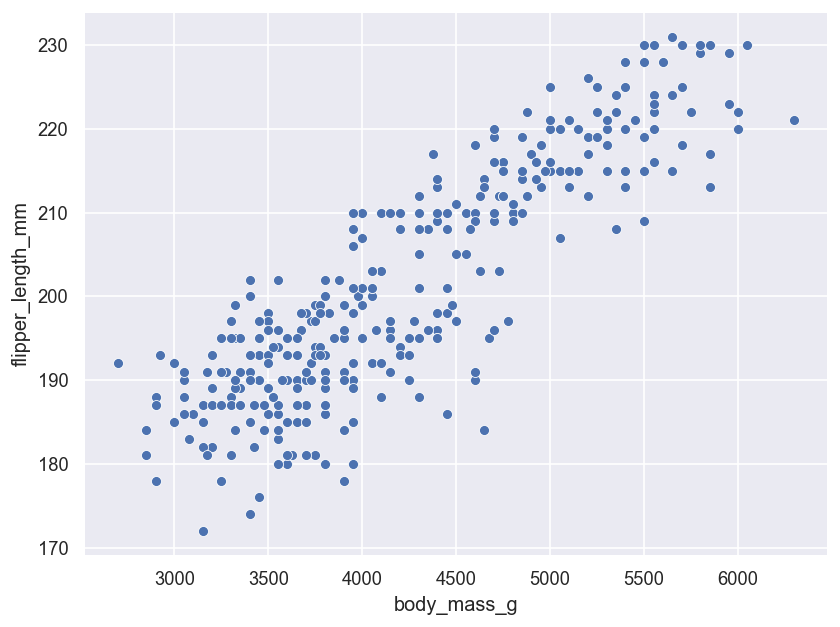

In [4]:
# set the default resolution of all following plots, feel free to modify it for
# your own device, and implicitly sets the seaborn default theme - also note
# that you can modify the figure size of individual plots with
# plt.figure(figsize = (x, y))
sns.set_theme(rc={"figure.dpi": 120, "figure.figsize": (8, 6)})

sns.scatterplot(data=penguins, x="body_mass_g", y="flipper_length_mm")
plt.show()

We should first give our plot a title.

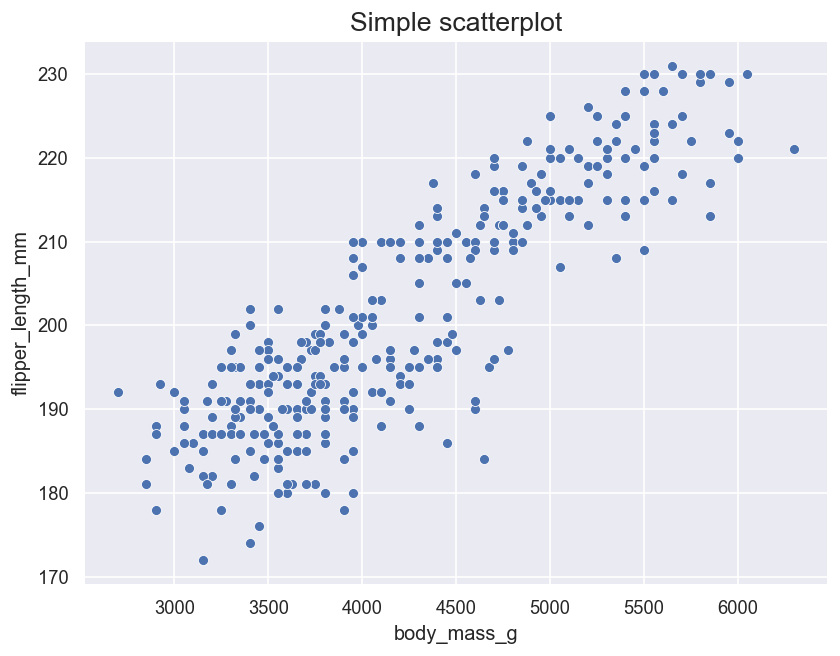

<AxesSubplot:>

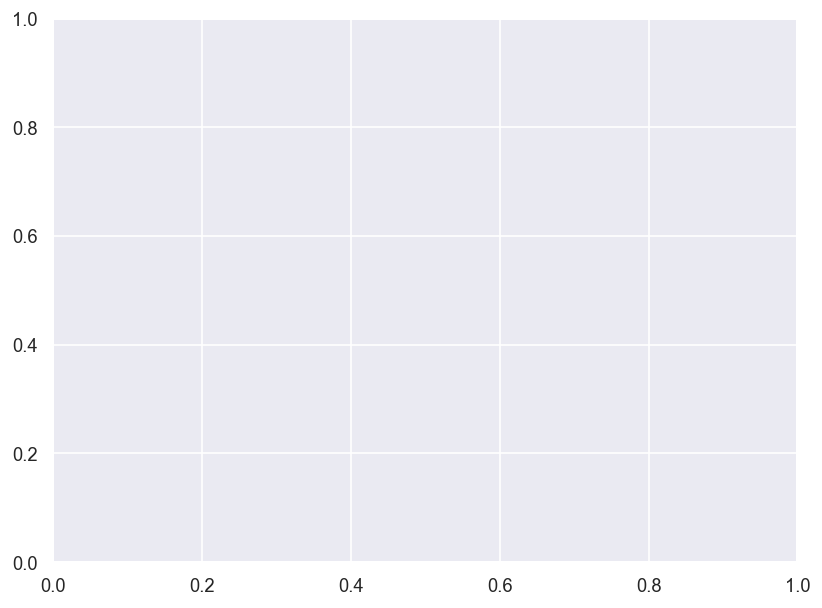

In [5]:
# state-based plotting "forgets" about our plots after displaying it so we need
# to re-run the scatterplot function
sns.scatterplot(data=penguins, x="body_mass_g", y="flipper_length_mm")
plt.title("Simple scatterplot", fontsize=16)
plt.show()

sns.scatterplot()

In this introduction we will go with the seaborn style presets but you can manually modify almost all features of the above plot. For example, some handy arguments are `marker` for the point style (see [here](https://matplotlib.org/stable/api/markers_api.html#module-matplotlib.markers) for a list of markers), `color` for the marker color (either a [named color](https://matplotlib.org/stable/gallery/color/named_colors.html) or a hex code), `alpha` for the point transparency, and `s` for the marker size.

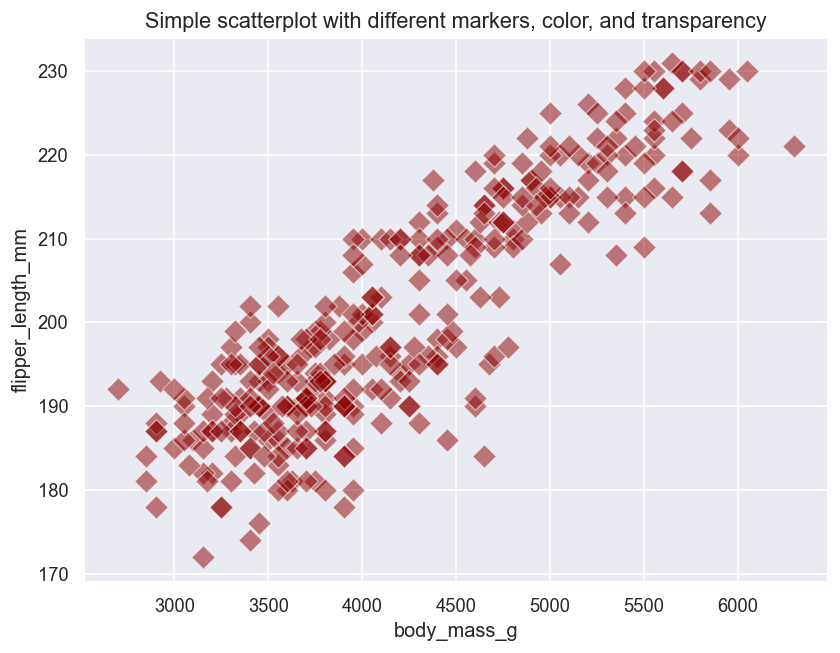

In [6]:
sns.scatterplot(
    data=penguins,
    x="body_mass_g",
    y="flipper_length_mm",
    marker="D",
    color="darkred",
    alpha=0.5,
    s=10 ** 2,
)
plt.title("Simple scatterplot with different markers, color, and transparency", fontsize=13)
plt.show()

If we look at the plot itself, we see that penguins that weigh more seem to also have larger flippers, which makes sense. However, we are looking at all the penguins at the moment and it would be nicer if we could distinguish the different sexes or species. We can do this by giving the species different colors with the `hue` parameter and giving the sexes different shapes with the `style` parameter.

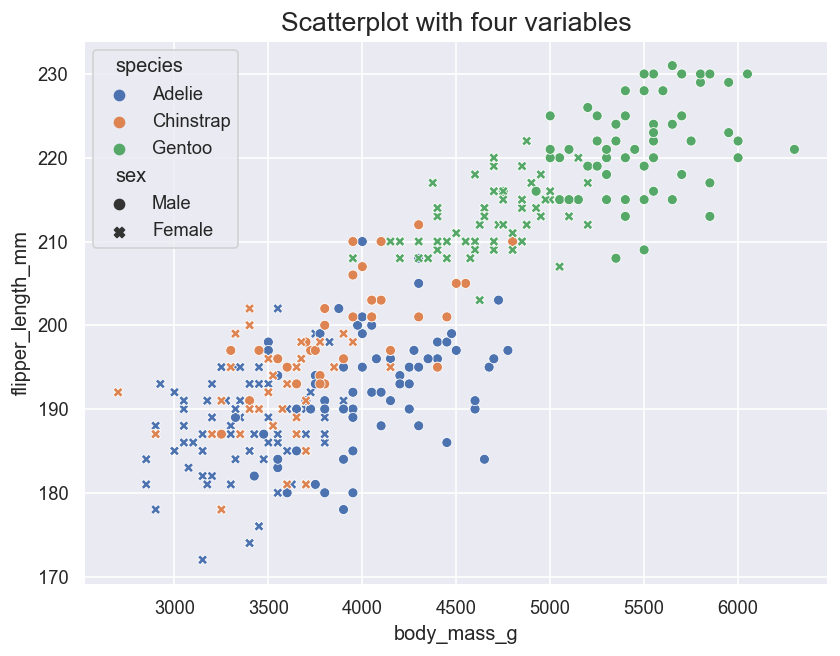

In [7]:
sns.scatterplot(
    x="body_mass_g",
    y="flipper_length_mm",
    hue="species",
    style="sex",
    data=penguins
)

plt.title("Scatterplot with four variables", fontsize=16)
plt.show()

Alternatively, we can also use the marker color to describe a numeric variable instead of a categorical variable.

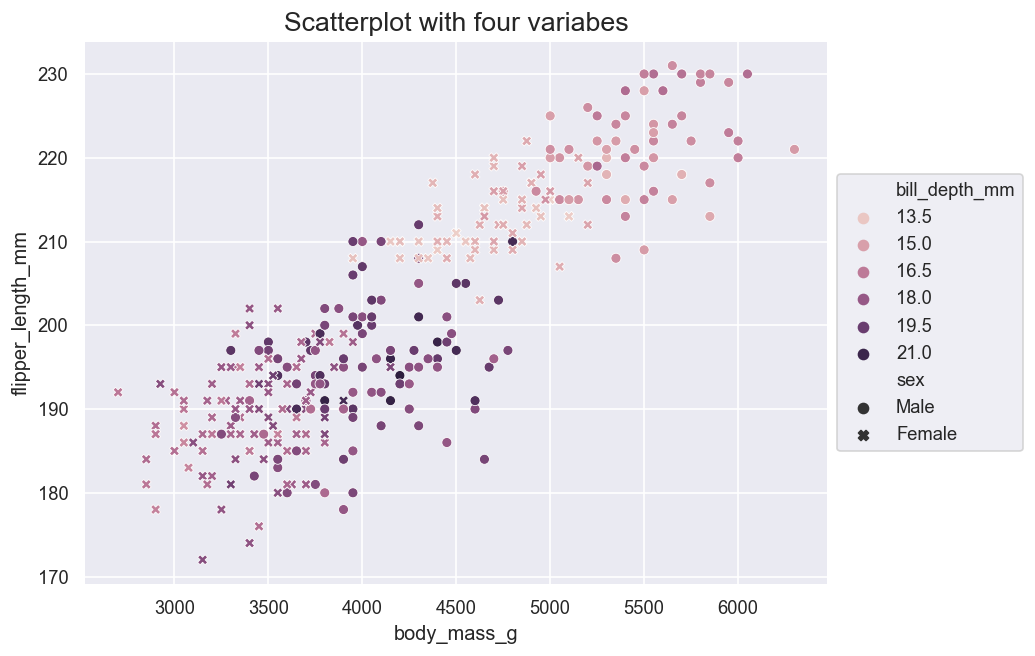

In [8]:
sns.scatterplot(
    x="body_mass_g",
    y="flipper_length_mm",
    hue="bill_depth_mm",
    style="sex",
    data=penguins,
)

plt.title("Scatterplot with four variabes", fontsize=16)

# this moves the legend outside of the plot, see here
# https://jdhao.github.io/2018/01/23/matplotlib-legend-outside-of-axes/ for a
# detailed explanation
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))

plt.show()

We can even represent an additional numeric variable if we make the marker size depend on it with the `size` parameter.

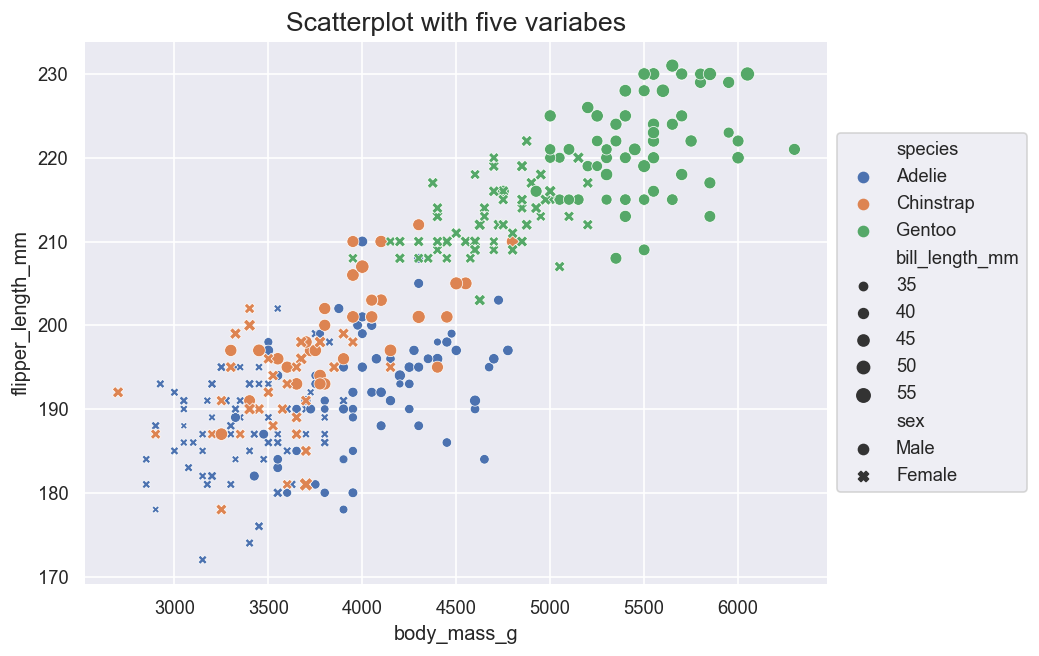

In [9]:
sns.scatterplot(
    x="body_mass_g",
    y="flipper_length_mm",
    hue="species",
    style="sex",
    size="bill_length_mm",
    data=penguins
)

plt.title("Scatterplot with five variabes", fontsize=16)

plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))

plt.show()

Those kinds of representations get crowded very fast but it is still nice to keep in mind how many variables we can encode in a single scatterplot.

To avoid crowded plots with too much bundled information seaborn supports another set of **grid-plot functions** for each plot type that can split your plot up into different subplots based on a categorical variable (like species or sex). In the case of scatterplots the corresponding grid-plot function is the `relplot()` function. Those functions support a `col` argument to specify the variable you want to split on and `col_wrap` which sets the amount of columns your grid will have.

Grid-plot functions are handled a bit differently internally by Python. For example, we have to define the size of the individual subplots specifically with the `height` and `aspect` parameters and you might also notice that we set the title with a different function for the multi-plot layout.

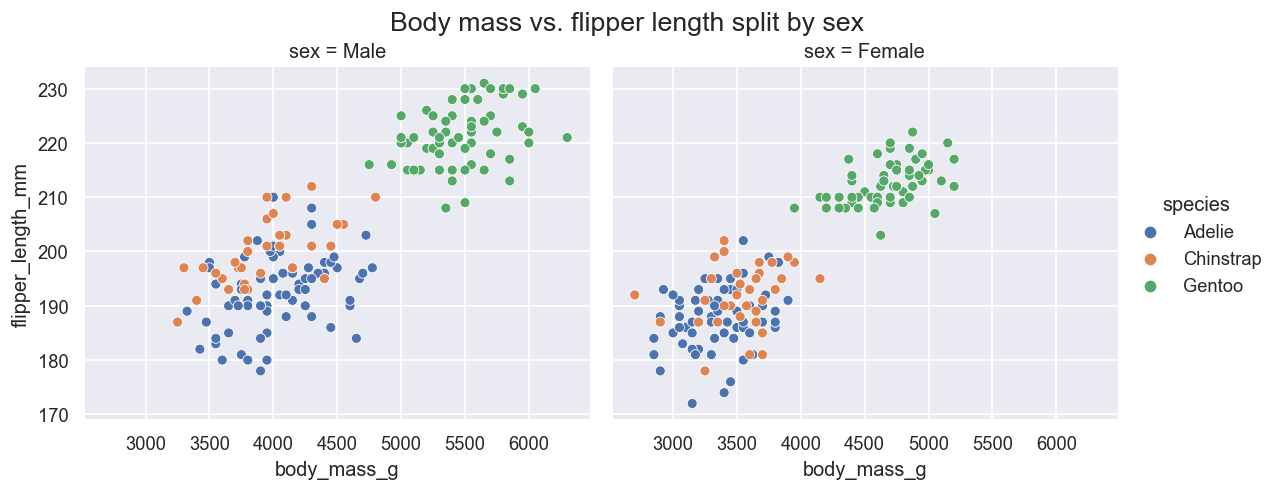

In [10]:
sns.relplot(
    data=penguins,
    x="body_mass_g",
    y="flipper_length_mm",
    hue="species",
    col="sex",
    aspect=6 / 5,
    height=4
)

# command to set the title for a grid plot, the y variable can be used to adjust
# the height of the title, y=1 is exactly at the upper figure border
plt.suptitle("Body mass vs. flipper length split by sex", y=1.02, fontsize=16)

plt.show()

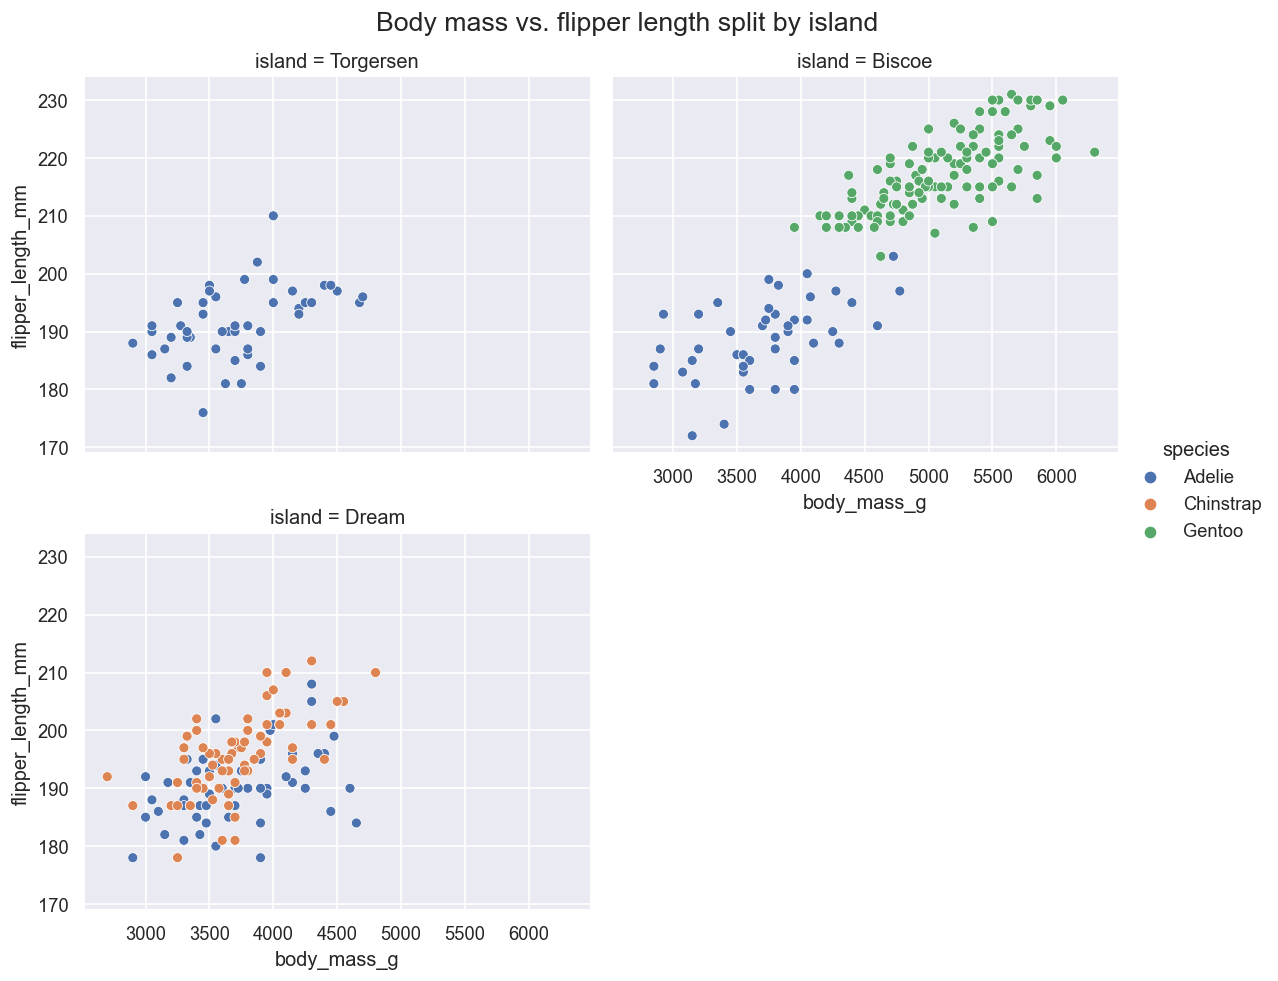

In [11]:
sns.relplot(
    data=penguins,
    x="body_mass_g",
    y="flipper_length_mm",
    hue="species",
    col="island",
    col_wrap=2,
    aspect=6 / 5,
    height=4
)

# command to set the title for a grid plot, the y variable can be used to adjust
# the height of the title, y=1 is exactly at the upper figure border
plt.suptitle("Body mass vs. flipper length split by island", y=1.02, fontsize=16)

plt.show()

### Linear regression
Often we want to fit a function such as a straight line to our datapoints to see which trend they follow. This is called linear regression and is easily available in seaborn with the `lmplot()` function. The bands surrounding the modeled function by default indicate confidence intervals, a measure of the prediction uncertainty. Again, we can group the points by a variable with the `hue` parameter and we can even use the `col` parameter to split our data into separate plots based on another variable.

**Note:** With `lmplot()` we already use the grid-plot function, even for single plots, because the actual single-plot function `regplot()` does not have a hue parameter for some reason (seaborn/matplotlib can be a bit inconsistent sometimes)

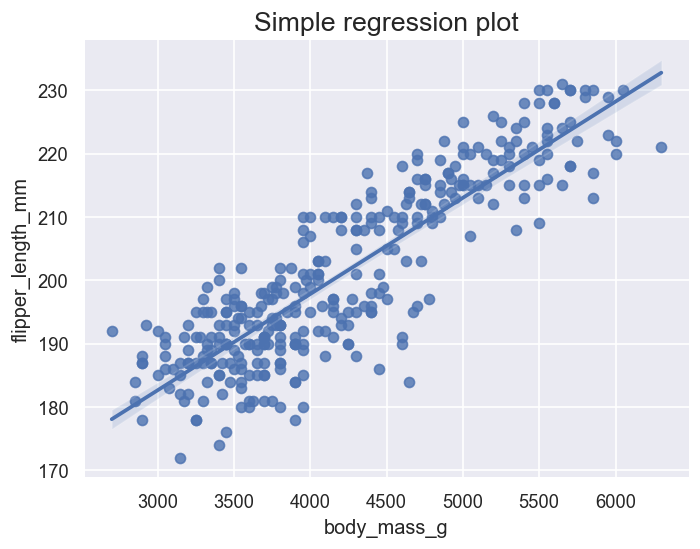

In [12]:
sns.lmplot(
    data=penguins,
    x="body_mass_g",
    y="flipper_length_mm",
    height=4.5,
    aspect=6 / 4.5
)

plt.title("Simple regression plot", fontsize=16)
plt.show()

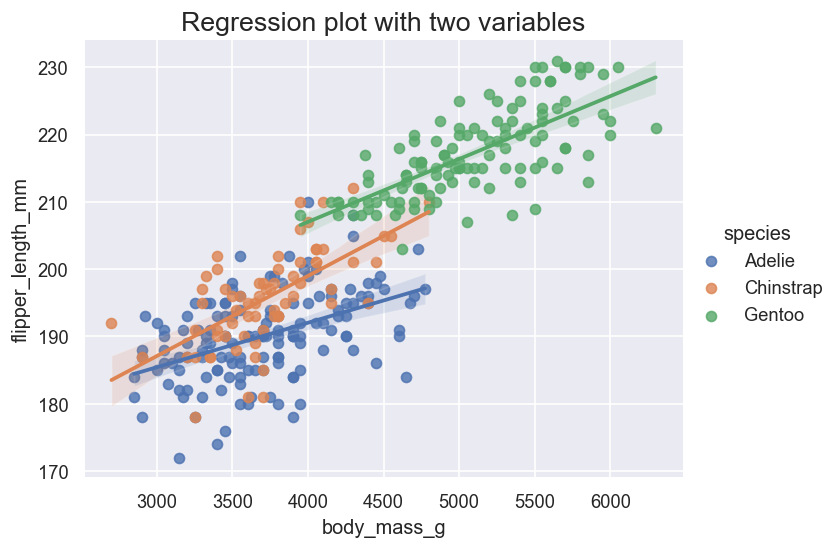

In [13]:
sns.lmplot(
    data=penguins,
    x="body_mass_g",
    y="flipper_length_mm",
    hue="species",
    height=4.5,
    aspect=6 / 4.5,
)

plt.title("Regression plot with two variables", fontsize=16)
plt.show()


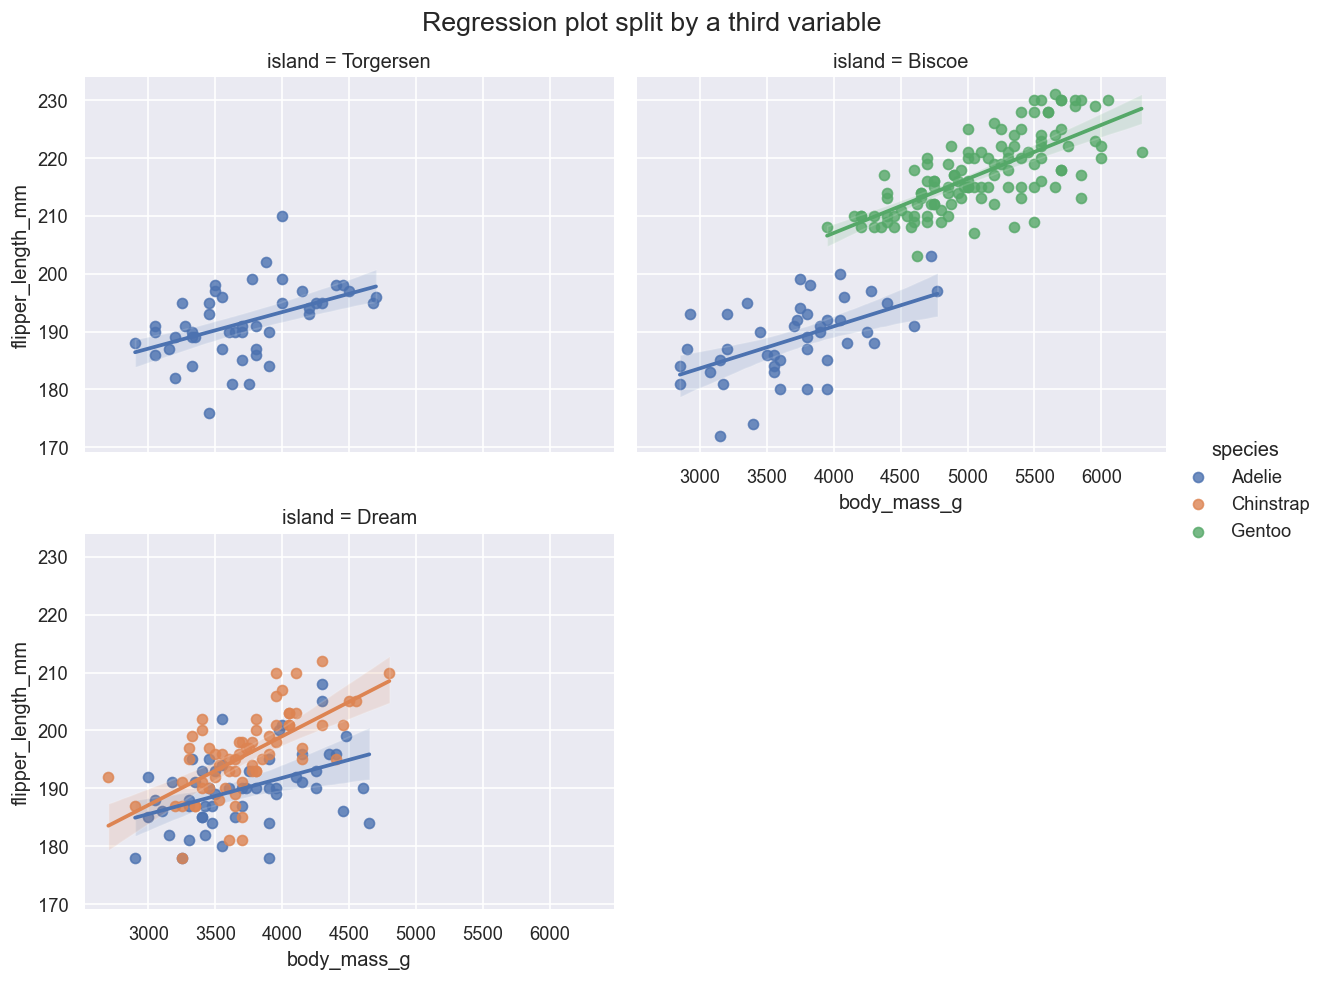

In [14]:
sns.lmplot(
    data=penguins,
    x="body_mass_g",
    y="flipper_length_mm",
    hue="species",
    col="island",
    height=4,
    aspect=5 / 4,
    col_wrap=2,
)

plt.suptitle("Regression plot split by a third variable", fontsize=16, y=1.02)
plt.show()

### Pairplots
A pairplot is a very useful grid-plot utility that allows you to quickly plot all the numeric variables in your dataset against each other. On the diagonal, where both x and y are the same variable, seaborn will instead plot a density graph (= smoothed histogram) to show the distribution of this variable. Pairplots are useful to get an overview of the data and identify variables that best separate the different groups in your dataset. Again, you can use arguments like `hue` or `width` and `aspect` and you can also use the `kind` keyword to switch to different subplots instead of the default scatterplots.

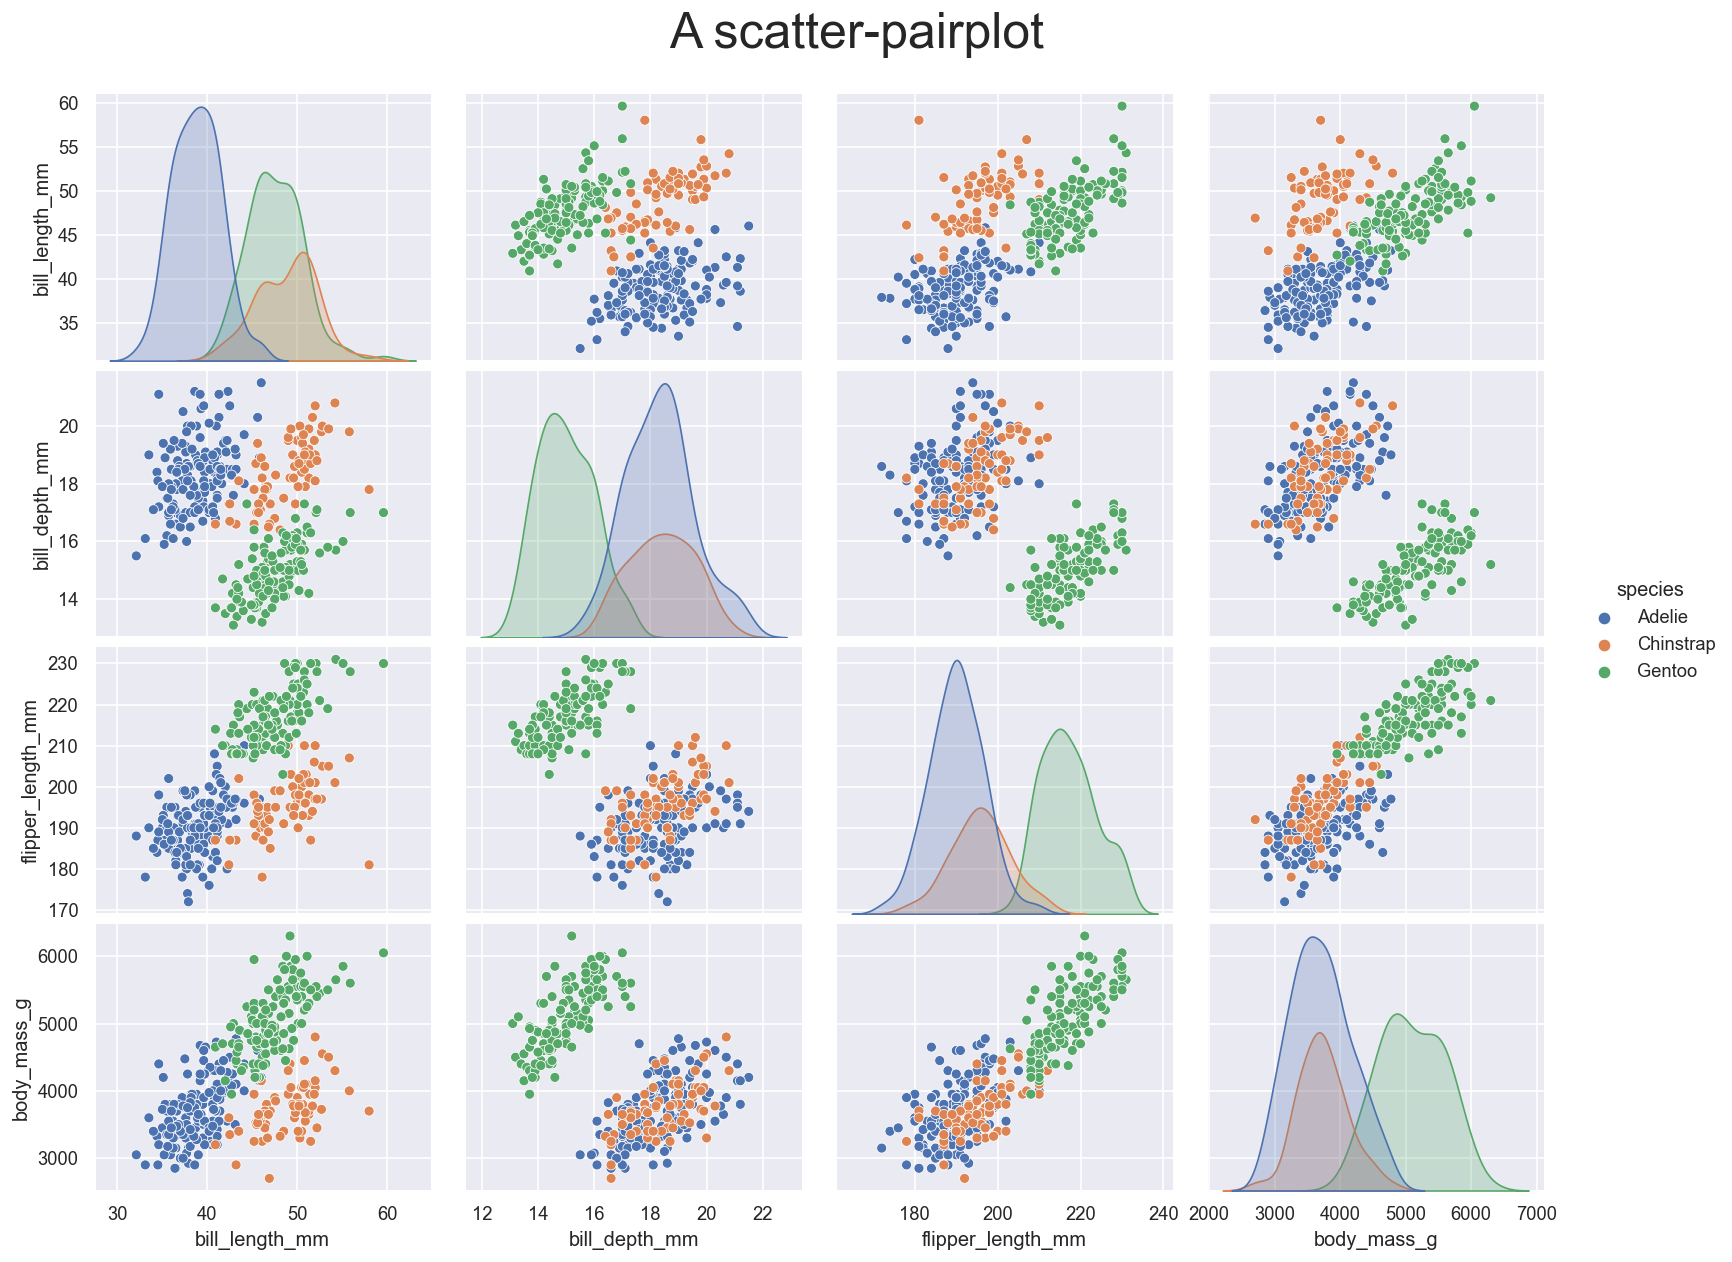

In [15]:
sns.pairplot(data=penguins, hue="species", aspect=4 / 3)

plt.suptitle("A scatter-pairplot", fontsize=30, y=1.05)

plt.show()

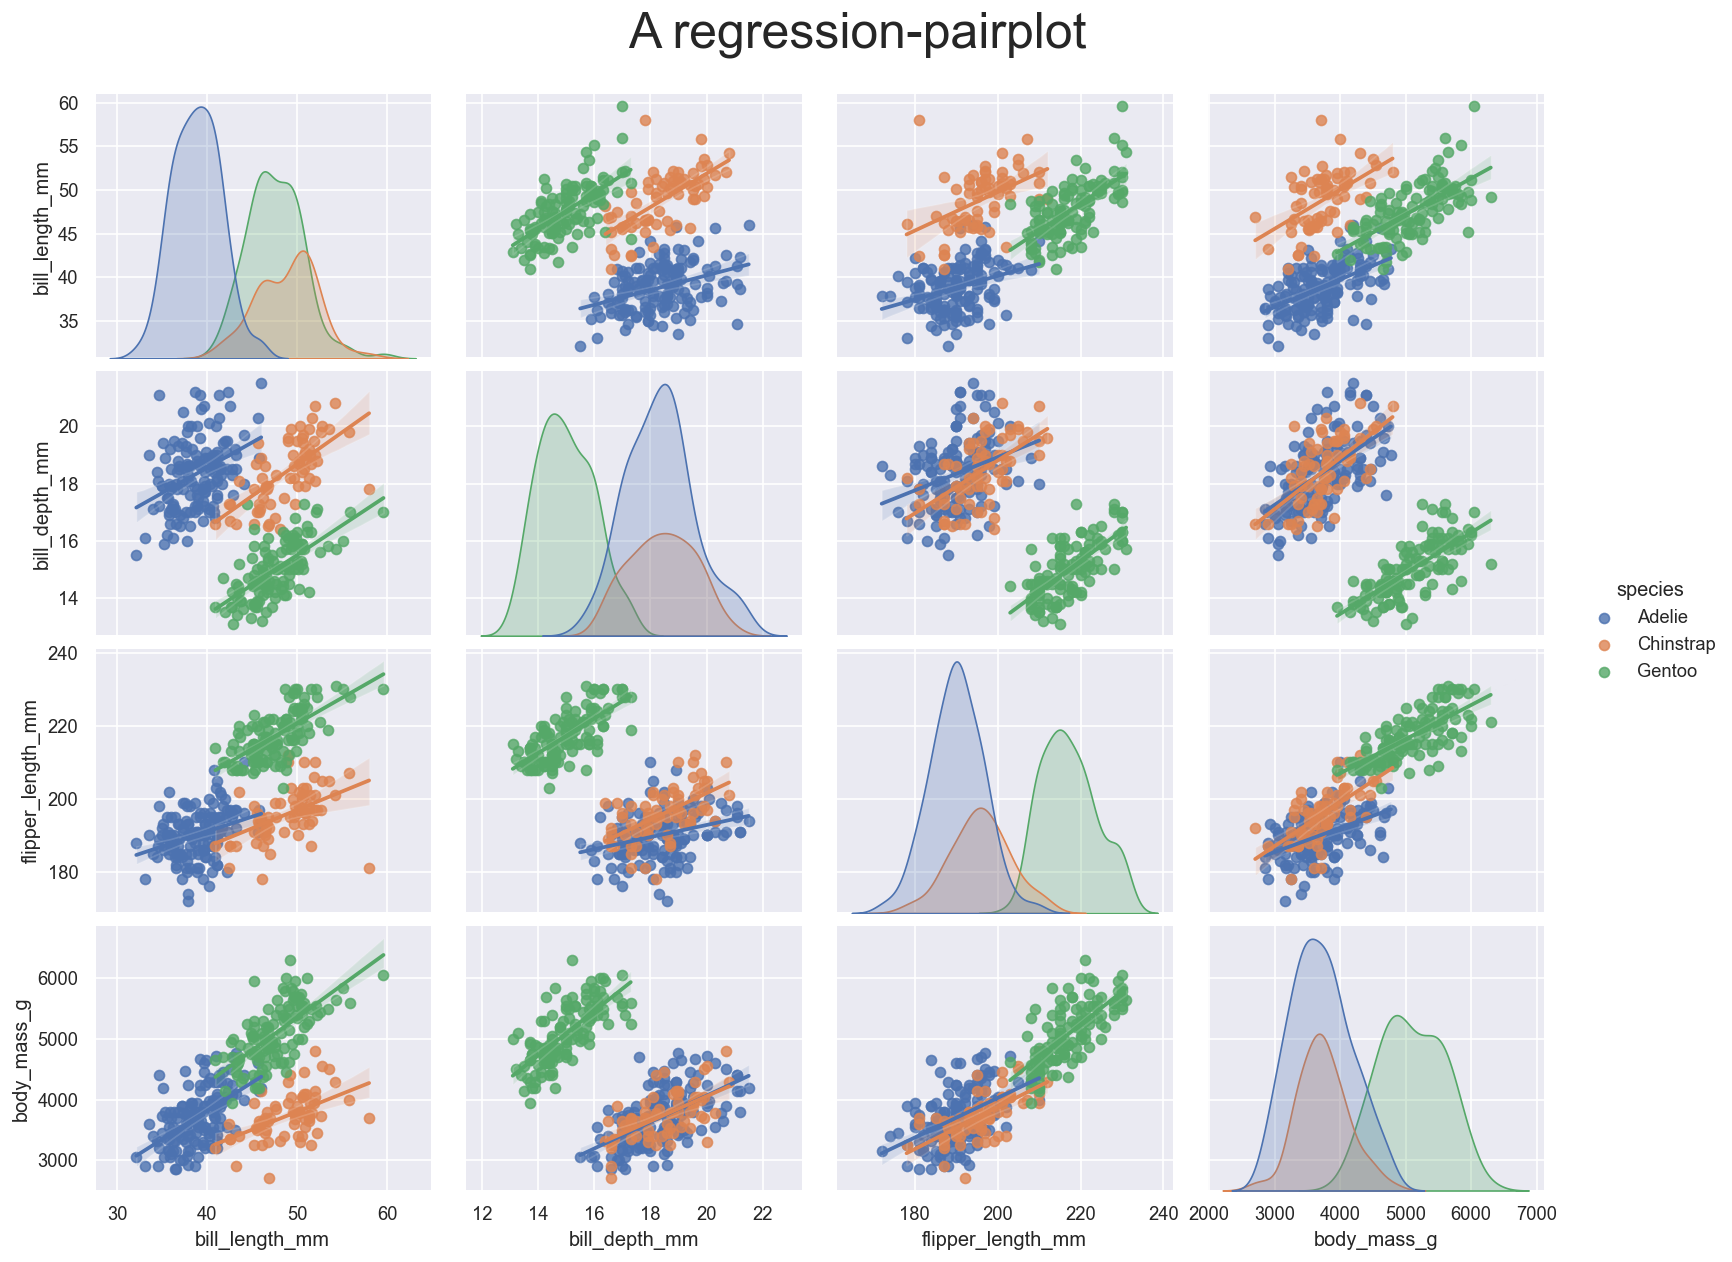

In [16]:
sns.pairplot(data=penguins, hue="species", aspect=4 / 3, kind="reg")

plt.suptitle("A regression-pairplot", fontsize=30, y=1.05)

plt.show()

## Boxplots
Scatterplots and linear regression plots are nice when we are dealing with multiple numeric values. Often though we will have multiple categorical values and want to see how they influence a single numerical value. For example, we could be interested in analyzing how body weight depends on the penguin species or sex.

In this case, it makes sense to use a boxplot. Boxplots capture the distribution of a numeric variable in a box-shape that allows easy comparison between different categorical variables. A boxplot is made up of the following parts:

* **box**: The box resembles the borders that contain the middle 50% of all the data points centered on the median (25% up from the median and 25% down from the median)
* **median-line**: The median-line is drawn within the box and indicates the median of the data points.
* **whiskers**: The whiskers are the lines that extend outwards from the box. The lower whisker represents the range from the lower box border up to the lowest data point within 1.5 times the *inner-quartile range* IQR (= height of the box) measured from the box border. The upper whisker correspondingly represents the range from the upper box border up to the highest data point within 1.5*IQR from the upper box border. The whiskers are a visual representation of the spread of the data.
* **outliers**: Some points might not be caught by the whisker borders and are plotted separately as dots. Those represent extreme outliers that are not representative of the rest of the data distribution.

<div>
<img src="../images/boxplot.png" width="600"/>
</div>

Now that we understand the concept of a boxplot we can see it in action on the penguin dataset.

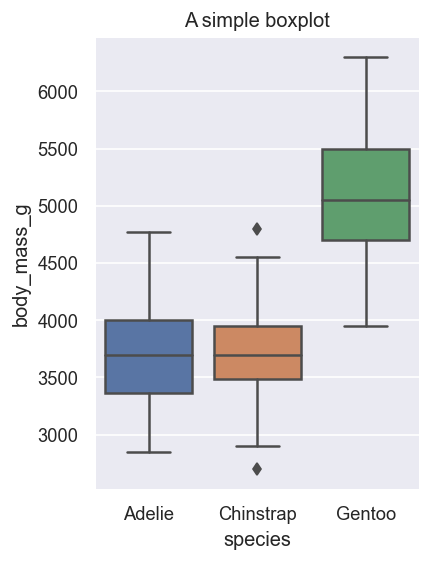

In [17]:
plt.figure(figsize=(3.5, 5))

sns.boxplot(data=penguins, x="species", y="body_mass_g")

plt.title("A simple boxplot")

plt.show()

For illustration we can also plot the original data points on top of the boxes with a `stripplot`.

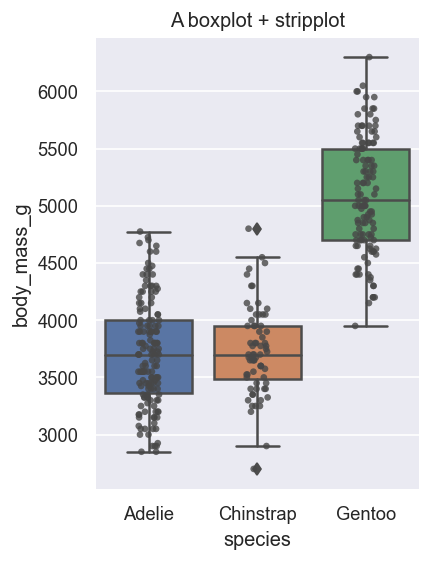

In [18]:
plt.figure(figsize=(3.5, 5))

sns.stripplot(data=penguins, x="species", y="body_mass_g", color="#474747", s=2**2, alpha=0.8)
sns.boxplot(data=penguins, x="species", y="body_mass_g")

plt.title("A boxplot + stripplot")

plt.show()

Again, we can use the `hue` argument to encode another variable.

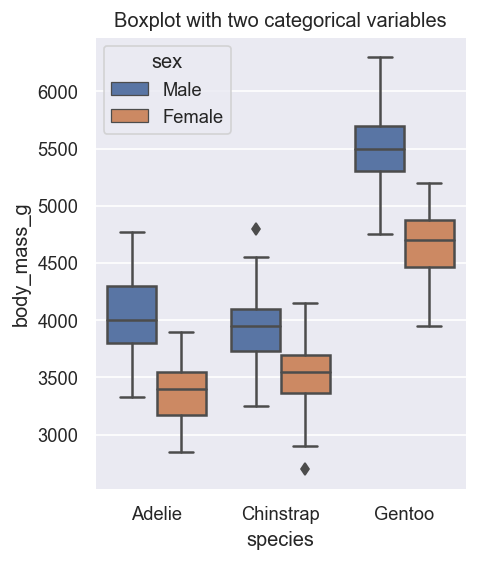

In [19]:
plt.figure(figsize=(4, 5))

sns.boxplot(data=penguins, x="species", y="body_mass_g", hue="sex")

plt.title("Boxplot with two categorical variables")

plt.show()

As all plots before, boxplots also have a grid-plot version in the form of the `catplot()` function.

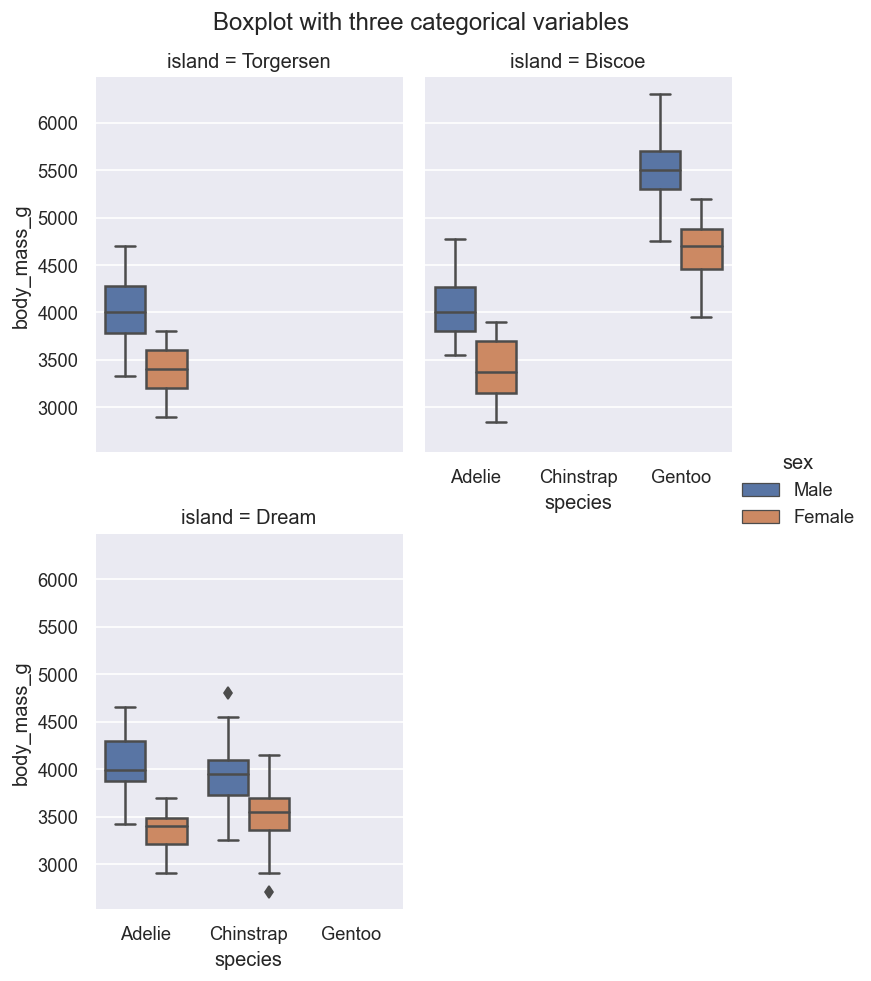

In [20]:
sns.catplot(
    data=penguins,
    x="species",
    y="body_mass_g",
    col="island",
    hue="sex",
    col_wrap=2,
    height=4,
    aspect=4 / 5,
    kind="box"
)

plt.suptitle("Boxplot with three categorical variables", y=1.02)

plt.show()

## Saving figures
When you are satisfied with your figure you can save it in image formats like .pdf, .jpg, .png, .svg, ... with the `plt.savefig()` function. The filename can be a path relative to the location of your Jupyter Notebook or an absolute path like "/Users/lukas/..." on Mac or "C:/Users/lukas/..." on Windows. Windows users should note that Python likes forward-slashes (/) for paths and is confused by back-slashes (\\) which are unfortunately the default way of showing paths in Windows. You can prevent this by writing an `r` in front of the filename.

The resolution of your plot is given by the `dpi` (dots-per-inch) argument.

**Note:** A common mistake is also to use `plt.show()` before `plt.savefig()`, which will save an empty plot. Remember, in state-based plotting `plt.show()` empties our canvas.

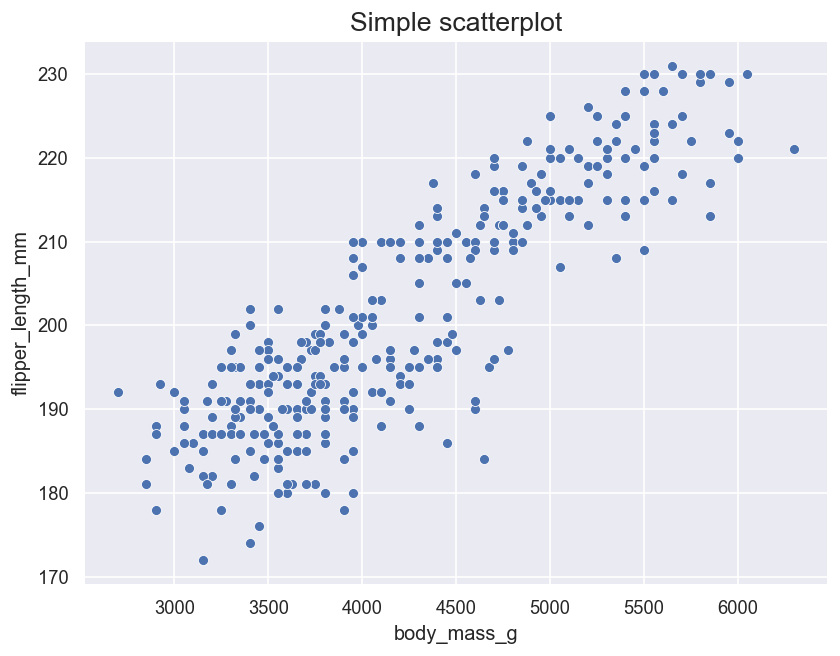

In [21]:
sns.scatterplot(data=penguins, x="body_mass_g", y="flipper_length_mm")
plt.title("Simple scatterplot", fontsize=16)

# simply save our plot in normal resolution
plt.savefig("../plots/simple_scatterplot.png", dpi=100)

# save our plot in high resolution
plt.savefig("../plots/simple_scatterplot_high-res.png", dpi=400)

# save our plot with an absolute path (will be different on your system)
plt.savefig(
    "C:/Users/jarosch/OneDrive/Studium/Master/Informatics in Biochemistry/Pictures/simple_scatterplot.png",
    dpi=100
)

# save our plot with an absolute path with backslashes
plt.savefig(
    r"C:\Users\jarosch\OneDrive\Studium\Master\Informatics in Biochemistry\Pictures\simple_scatterplot2.png",
    dpi=100
)

Sometimes when you manually adjust title or legend positions they can get cut by `savefig()`. You can avoid this by specifying `bbox_inches="tight"`.

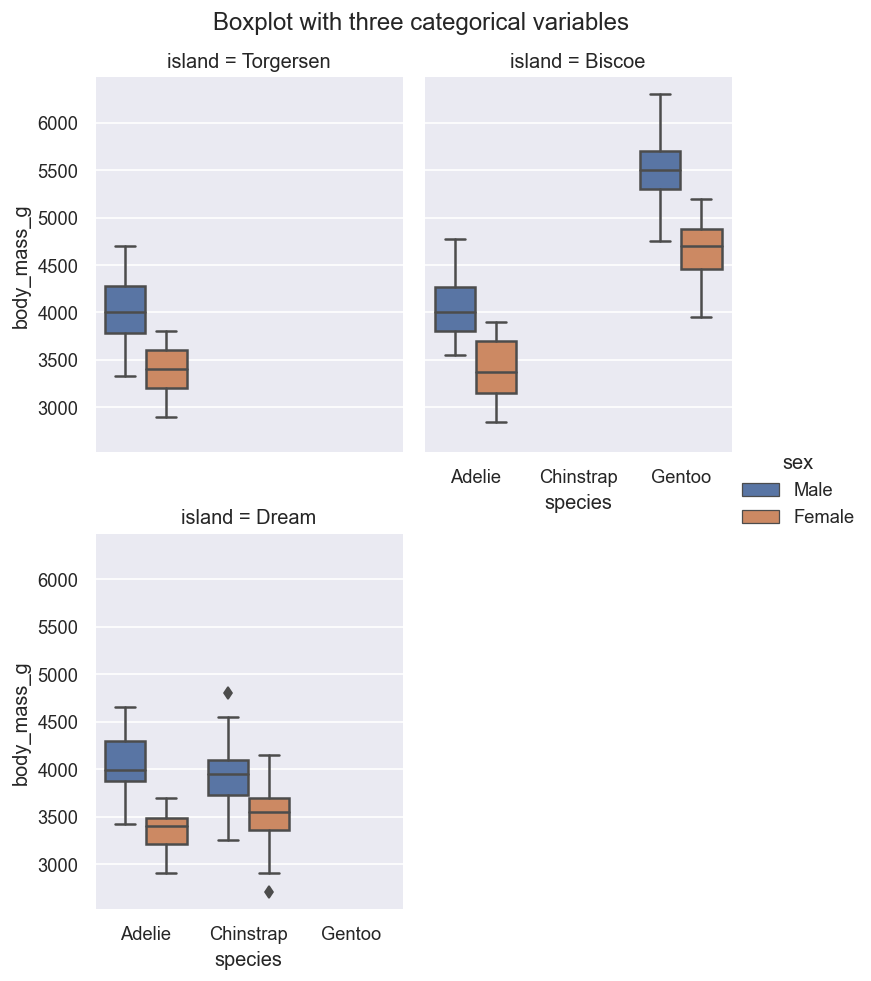

In [22]:
sns.catplot(
    data=penguins,
    x="species",
    y="body_mass_g",
    col="island",
    hue="sex",
    col_wrap=2,
    height=4,
    aspect=4 / 5,
    kind="box"
)

# we manually set the title up with the y argument and this will get cut by
# savefig() if we do nothing against it
plt.suptitle("Boxplot with three categorical variables", y=1.02)

plt.savefig("../plots/boxplot_cut-title.png")

# avoid this with bbox_inches="tight"
plt.savefig("../plots/boxplot.png", bbox_inches="tight")